<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/MFormulaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de formulación simétrica variacional

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sp.symbols('x') # variable
u = sp.Function('u') # función

In [3]:
ode = u(x).diff(x,x) + u(x) - x**2
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x**2 - 2)

In [4]:
sol = sp.dsolve(ode, ics={u(0):0,u(1):0})

In [5]:
sol

Eq(u(x), x**2 + (1 - 2*cos(1))*sin(x)/sin(1) + 2*cos(x) - 2)

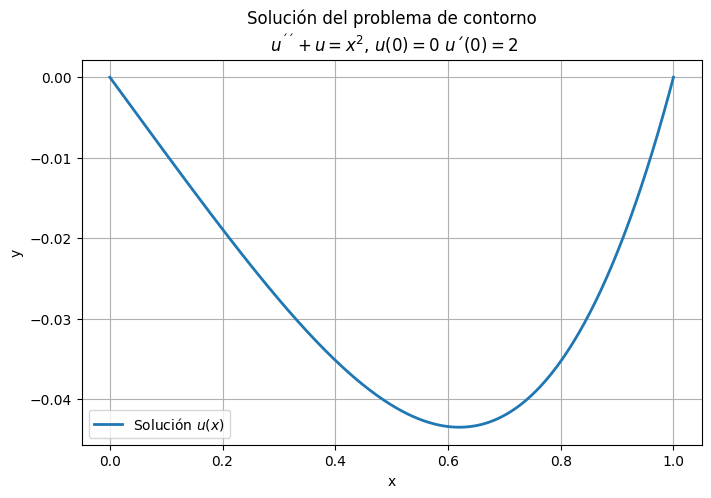

In [6]:
u_expr = sol.rhs

u_num = sp.lambdify(x,u_expr,"numpy")

xx = np.linspace(0,1,400)
yy = u_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title('Solución del problema de contorno\n $u^{´´} + u=x^2$, $u(0)=0$ $u´(0)=2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
b1 = x * (1 - x)
b2 = x ** 2 * (1 - x)

In [8]:
db1 = b1.diff(x)
db1

1 - 2*x

In [9]:
db2=b2.diff(x)
db2

-x**2 + 2*x*(1 - x)

In [10]:
-db1**2+b1**2

x**2*(1 - x)**2 - (1 - 2*x)**2

In [11]:
K11=sp.integrate(-db1*db1+b1*b1, (x,0,1))
K12=sp.integrate(-db1*db2+b1*b2, (x,0,1))
K21=sp.integrate(-db2*db1+b2*b1, (x,0,1))
K22=sp.integrate(-db2*db2+b2*b2, (x,0,1))

In [12]:
print(K11,K12,K21,K22)

-3/10 -3/20 -3/20 -13/105


In [13]:
k=sp.Matrix([[K11,K12],
            [K21,K22]])

In [14]:
k

Matrix([
[-3/10,   -3/20],
[-3/20, -13/105]])

In [15]:
F1=sp.integrate(x**2*b1,(x,0,1))
F2=sp.integrate(x**2*b2,(x,0,1))
print(F1,F2)

1/20 1/30


In [16]:
F=sp.Matrix([[F1],[F2]])
F

Matrix([
[1/20],
[1/30]])

In [17]:
s=k.solve(F)
s

Matrix([
[-10/123],
[  -7/41]])

In [18]:
A1=s[0]
A2=s[1]

In [19]:
A1

-10/123

In [20]:
A2

-7/41

In [21]:
u2=A1*x*(x-1)+A2*x**2*(x-1)

In [22]:
u2

-7*x**2*(x - 1)/41 - 10*x*(x - 1)/123

In [26]:
u_approx_fn = sp.lambdify(x, u2, "numpy")

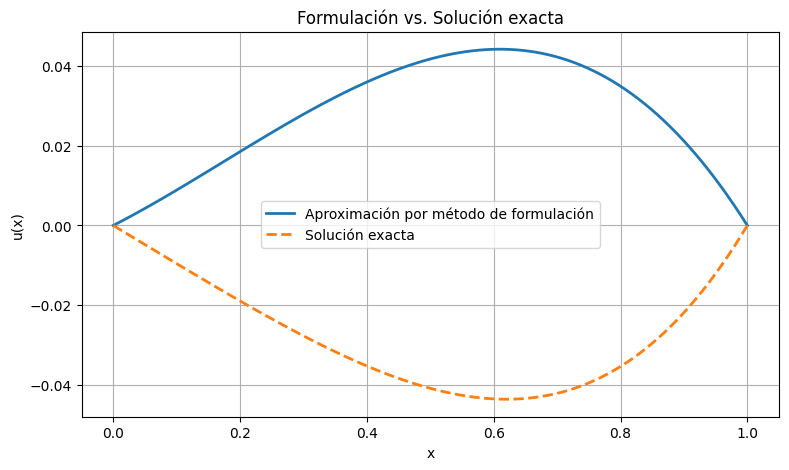

In [35]:
xx=np.linspace(0,1,100)
yy = u_num(xx)

plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label="Aproximación por método de formulación", linewidth=2)
plt.plot(xx,yy, "--", label="Solución exacta", linewidth=2)


plt.title('Formulación vs. Solución exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()